In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = utils.get_raw_food_dataset_df()

data

,Unnamed: 0,Classification,Year,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity,Trade Value (US$)
0,0,H5,2018,1,Import,124,Canada,0,World,2,Meat and edible meat offal,1924724587
1,1,H5,2018,2,Export,124,Canada,0,World,2,Meat and edible meat offal,5109384612
2,2,H5,2018,2,Export,124,Canada,4,Afghanistan,2,Meat and edible meat offal,79016
3,3,H5,2018,2,Export,124,Canada,8,Albania,2,Meat and edible meat offal,1108403
4,4,H5,2018,2,Export,124,Canada,12,Algeria,2,Meat and edible meat offal,25008
...,...,...,...,...,...,...,...,...,...,...,...,...
849262,849262,H1,2001,2,Export,842,USA,862,Venezuela,22,"Beverages, spirits and vinegar",3414509
849263,849263,H1,2001,2,Export,842,USA,882,Samoa,22,"Beverages, spirits and vinegar",67205
849264,849264,H1,2001,2,Export,842,USA,887,Yemen,22,"Beverages, spirits and vinegar",59851
849265,849265,H1,2001,1,Import,842,USA,891,Serbia and Montenegro,22,"Beverages, spirits and vinegar",377174


Do we have any NA values?

In [3]:
# Detect NA values
data.isna().sum()

Unnamed: 0           0
Classification       0
Year                 0
Trade Flow Code      0
Trade Flow           0
Reporter Code        0
Reporter             0
Partner Code         0
Partner              0
Commodity Code       0
Commodity            0
Trade Value (US$)    0
dtype: int64

Cool! No empty data to clean. Let's also see what the dataset looks like with numbers:

In [4]:
data.describe()

,Unnamed: 0,Year,Trade Flow Code,Reporter Code,Partner Code,Commodity Code,Trade Value (US$)
count,849267.000000,849267.000000,849267.000000,849267.000000,849267.000000,849267.000000,8.492670e+05
mean,424633.000000,2009.906847,1.578116,443.488351,432.911823,12.655153,4.452985e+07
std,245162.409869,5.733268,0.493860,238.429613,253.939014,6.519337,4.148211e+08
min,0.000000,2000.000000,1.000000,124.000000,0.000000,2.000000,0.000000e+00
25%,212316.500000,2005.000000,1.000000,251.000000,212.000000,7.000000,4.000000e+04
50%,424633.000000,2010.000000,2.000000,381.000000,422.000000,12.000000,4.394430e+05
75%,636949.500000,2015.000000,2.000000,699.000000,659.000000,19.000000,4.556688e+06
max,849266.000000,2019.000000,2.000000,842.000000,899.000000,22.000000,4.588776e+10


Let's take a look into the distribution of some of the columns:

<AxesSubplot:title={'center':'Trade Flow Count'}, ylabel='Reporter'>

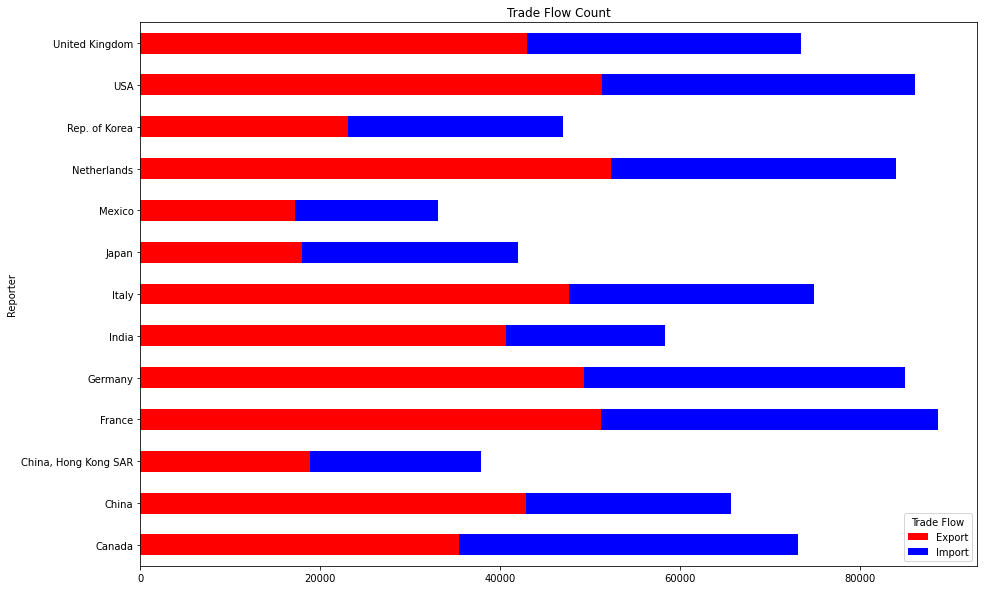

In [5]:
trade_type = data.groupby(['Reporter', 'Trade Flow']) \
    .size() \
    .reset_index(name = 'Count')
trade_type_count = trade_type.groupby(['Reporter', 'Trade Flow']) \
    .Count \
    .sum()
trade_type_count.unstack() \
    .plot(kind='barh', stacked=True, color=['r', 'b','g','y'], figsize=(15, 10), title="Trade Flow Count", xlabel="Reporter")

What is the distribution of the traded items, per country?

<AxesSubplot:title={'center':'Canada'}, xlabel='Year'>

<AxesSubplot:title={'center':'China'}, xlabel='Year'>

<AxesSubplot:title={'center':'China, Hong Kong SAR'}, xlabel='Year'>

<AxesSubplot:title={'center':'France'}, xlabel='Year'>

<AxesSubplot:title={'center':'Germany'}, xlabel='Year'>

<AxesSubplot:title={'center':'India'}, xlabel='Year'>

<AxesSubplot:title={'center':'Italy'}, xlabel='Year'>

<AxesSubplot:title={'center':'Japan'}, xlabel='Year'>

<AxesSubplot:title={'center':'Mexico'}, xlabel='Year'>

<AxesSubplot:title={'center':'Netherlands'}, xlabel='Year'>

<AxesSubplot:title={'center':'Rep. of Korea'}, xlabel='Year'>

<AxesSubplot:title={'center':'USA'}, xlabel='Year'>

<AxesSubplot:title={'center':'United Kingdom'}, xlabel='Year'>

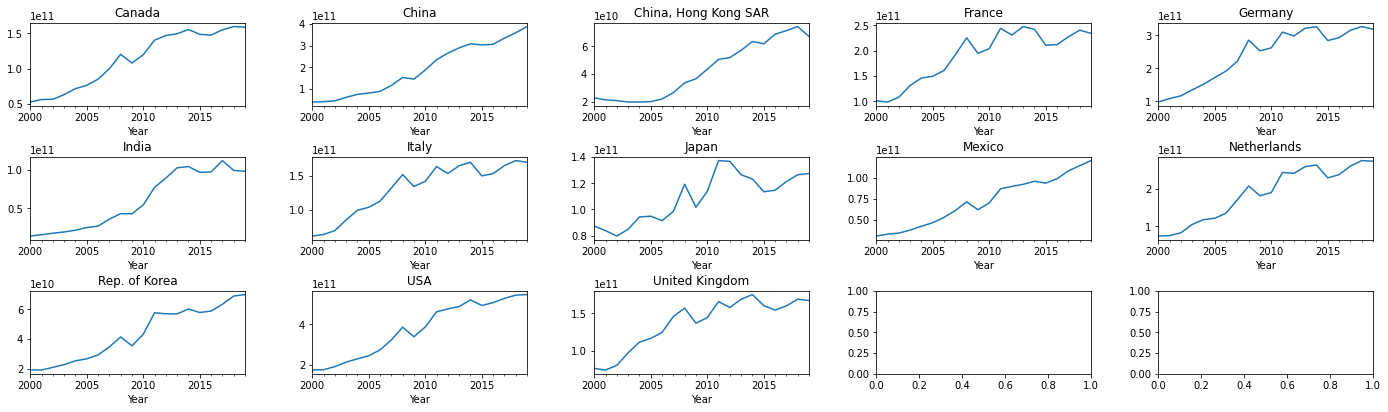

In [28]:
data_with_year = data.copy(deep=True)
data_with_year["Year"] = pd.to_datetime(data_with_year["Year"].astype(str), format="%Y")
data_with_year = data_with_year.groupby(["Year", "Reporter"])["Trade Value (US$)"] \
    .sum() \
    .unstack()

fig, axs = plt.subplots(3, 5)
fig.set_size_inches(20, 6)
fig.tight_layout(pad=3.0)

for column, ax in zip(data_with_year.columns, axs.flat):
    data_with_year[column].plot(kind="line", title=column, ax=ax)